In [2]:
# !pip install opencv-python

     |████████████████████████████████| 28.2 MB 7.1 MB/s eta 0:00:01


In [12]:
import torch
import random
import numpy as np
import cv2
from sys import exit
from random import randint


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [13]:
local = False

# Generate dataset from video

In [3]:
if local:
    path_to_path = "/Users/alex/workPrograms/"
else:
    path_to_path = "Untitled Folder/data/"
path = path_to_path + "Diploma/"
path

'Untitled Folder/data/Diploma/'

In [4]:
def load_video(path: str) -> list:
    res = []
    cap = cv2.VideoCapture(path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        res.append(frame)
    return res

In [14]:
vader = load_video(path + "Vader_Ahsoka.mp4")

In [15]:
vader_gray = np.array([cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in vader], dtype=np.uint8)

In [16]:
dog_original = load_video(path + "dog.mp4")

In [17]:
dog_gray = np.array([cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in dog_original], dtype=np.uint8)

In [5]:
wylsa_original = load_video(path + "wylsacom.mp4")

In [6]:
wylsa_gray = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in wylsa_original]
del(wylsa_original)
wylsa_gray = np.array(wylsa_gray, dtype=np.uint8)

In [10]:
from sys import getsizeof

getsizeof(wylsa_gray) / 1024 / 1024

7064.1456298828125

In [18]:
dog_gray

array([[[ 28,  21,  20, ..., 199, 212, 219],
        [ 37,  26,  20, ..., 199, 212, 219],
        [ 51,  35,  18, ..., 199, 212, 219],
        ...,
        [179, 176, 183, ..., 175, 172, 172],
        [169, 140, 158, ..., 172, 171, 170],
        [198, 178, 168, ..., 171, 171, 170]],

       [[ 28,  21,  20, ..., 193, 203, 214],
        [ 37,  26,  20, ..., 193, 203, 214],
        [ 51,  35,  18, ..., 193, 203, 214],
        ...,
        [179, 176, 183, ..., 175, 172, 172],
        [169, 140, 158, ..., 172, 171, 170],
        [198, 178, 168, ..., 171, 171, 170]],

       [[ 28,  21,  20, ..., 193, 203, 214],
        [ 37,  26,  20, ..., 193, 203, 214],
        [ 51,  35,  18, ..., 193, 203, 214],
        ...,
        [179, 176, 183, ..., 175, 172, 172],
        [169, 140, 158, ..., 172, 171, 170],
        [198, 178, 168, ..., 171, 171, 170]],

       ...,

       [[ 27,  27,  32, ..., 168, 168, 168],
        [ 25,  25,  30, ..., 168, 168, 168],
        [ 26,  26,  31, ..., 168, 168, 168

In [19]:
def generate_x_y(video_gray, size=100, window=21):

    X, Y = [], []
    
    delta = (window-1)//2

    for i in range(size):
        y = randint(delta, len(video_gray[0])   -delta-1)
        x = randint(delta, len(video_gray[0][0])-delta-1)

        to_append = []
        for j in range(i, i+7-1+1):
            if j == i+3:
                Y.append([video_gray[j][y][x]/255])
                continue
            to_append.append(video_gray[j][y-delta:y+delta+1, x-delta:x+delta+1]/255)

        X.append(to_append)
    return torch.tensor(X, requires_grad=True, dtype=torch.float32), torch.tensor(Y, requires_grad=True, dtype=torch.float32)


In [20]:
x_train, y_train = generate_x_y(wylsa_gray, size=10_000)

In [123]:
x_test, y_test = generate_x_y(dog_gray, size=200)

In [21]:
x_train[0]

tensor([[[0.0000, 0.0000, 0.0941,  ..., 0.0471, 0.0471, 0.0431],
         [0.0549, 0.0353, 0.1137,  ..., 0.0667, 0.0431, 0.0392],
         [0.5294, 0.5059, 0.4235,  ..., 0.0510, 0.0353, 0.0235],
         ...,
         [0.0471, 0.0157, 0.0353,  ..., 0.0824, 0.0824, 0.0824],
         [0.0118, 0.0275, 0.0392,  ..., 0.1059, 0.1098, 0.1098],
         [0.0431, 0.0431, 0.0549,  ..., 0.1333, 0.1373, 0.1373]],

        [[0.0000, 0.0078, 0.0941,  ..., 0.0471, 0.0471, 0.0431],
         [0.0431, 0.0549, 0.1137,  ..., 0.0588, 0.0392, 0.0353],
         [0.5255, 0.4941, 0.4235,  ..., 0.0471, 0.0353, 0.0235],
         ...,
         [0.0471, 0.0157, 0.0353,  ..., 0.0824, 0.0824, 0.0824],
         [0.0118, 0.0275, 0.0392,  ..., 0.1059, 0.1098, 0.1098],
         [0.0431, 0.0431, 0.0549,  ..., 0.1333, 0.1373, 0.1373]],

        [[0.0000, 0.0078, 0.1255,  ..., 0.0471, 0.0471, 0.0392],
         [0.0431, 0.0549, 0.1255,  ..., 0.0431, 0.0353, 0.0353],
         [0.5255, 0.4941, 0.4000,  ..., 0.0392, 0.0314, 0.

# Нейросеть для чёрно-белого изображения

Пусть на вход поступает область изображения, скажем, 21х21. Будем предсказывать, яркость пикселя по центру

In [36]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=6, out_channels=3, kernel_size=11, padding=5)
        self.act1  = torch.nn.Tanh()
        # self.pool1 = torch.nn.AvgPool2d(kernel_size=3, stride=3)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=3, out_channels=1, kernel_size=11, padding=5)
        self.act2  = torch.nn.Tanh()
#         self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(441, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 50)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(50, 1)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        # x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
#         x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [37]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)
device

device(type='cuda', index=0)

In [38]:
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [41]:
batch_size = 10000

# test_accuracy_history = []
test_loss_history = []

x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = x_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(x_batch) 
        
#         print(len(preds))
#         print("""qqqqqqq
#         qqqqqqq
#         qqqqqqq""")
#         print(len(y_batch))
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(x_test)
    
#     print("""_______________
#     _______________
#     _______________""")
    
#     print(test_preds)
#     print("""qqqqqqq
#     qqqqqqq
#     qqqqqqq""")
#     print(y_test)
    
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
#     accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
#     test_accuracy_history.append(accuracy)
    
    print(f"epoch {epoch}, loss {loss(test_preds, y_test)}")
    
#     print(accuracy)

epoch 0, loss 0.002438305178657174
epoch 1, loss 0.002116442658007145


KeyboardInterrupt: 

In [66]:
x_test.shape

torch.Size([200, 6, 21, 21])

In [125]:
lenet5.forward(x_test.to(device))

tensor([[0.6875],
        [0.7074],
        [0.2339],
        [0.6808],
        [0.6718],
        [0.1730],
        [0.5509],
        [0.6224],
        [0.6673],
        [0.5674],
        [0.5949],
        [0.6932],
        [0.4783],
        [0.5966],
        [0.0789],
        [0.7000],
        [0.6795],
        [0.4944],
        [0.6985],
        [0.6549],
        [0.5699],
        [0.5179],
        [0.6333],
        [0.5696],
        [0.2535],
        [0.6928],
        [0.3018],
        [0.6306],
        [0.1249],
        [0.6961],
        [0.7122],
        [0.6716],
        [0.2076],
        [0.6809],
        [0.6327],
        [0.2684],
        [0.6694],
        [0.6682],
        [0.5020],
        [0.2024],
        [0.1606],
        [0.5613],
        [0.6996],
        [0.4121],
        [0.5938],
        [0.5868],
        [0.5846],
        [0.5433],
        [0.4647],
        [0.5050],
        [0.6713],
        [0.7012],
        [0.6873],
        [0.5581],
        [0.6656],
        [0

In [126]:
y_test

tensor([[0.6941],
        [0.7294],
        [0.2706],
        [0.6627],
        [0.6667],
        [0.1843],
        [0.6039],
        [0.6275],
        [0.6627],
        [0.5725],
        [0.5765],
        [0.6157],
        [0.4627],
        [0.5961],
        [0.1255],
        [0.7137],
        [0.6941],
        [0.4863],
        [0.7176],
        [0.6588],
        [0.5647],
        [0.5137],
        [0.6549],
        [0.5529],
        [0.2157],
        [0.6941],
        [0.2941],
        [0.6078],
        [0.1922],
        [0.7098],
        [0.7255],
        [0.6745],
        [0.2039],
        [0.6980],
        [0.6353],
        [0.2627],
        [0.6824],
        [0.6745],
        [0.4471],
        [0.1804],
        [0.1725],
        [0.5765],
        [0.7176],
        [0.3961],
        [0.5922],
        [0.5882],
        [0.5843],
        [0.5373],
        [0.4471],
        [0.4863],
        [0.6745],
        [0.7176],
        [0.6980],
        [0.5412],
        [0.6902],
        [0

In [143]:
def generate_middle_frame(neur, before_3, after_3, window=21):
    X = []
    delta = (window-1)//2
    R = [[0] * (len(before_3[0][0])-window+1) for i in range(len(before_3[0])-window+1)]
    for i in range(delta, len(before_3[0])-delta):
        string = []
        for j in range(delta, len(before_3[0][0])-delta):
            X = list(before_3[:, i-delta:i+delta+1, j-delta:j+delta+1]) + list(
                after_3[:, i-delta:i+delta+1, j-delta:j+delta+1])
            X = np.array(X)/255
            string.append(X)
        string = torch.tensor(string, requires_grad=True, dtype=torch.float32)
        string=string.to(device)
        res = neur.forward(string)
#         print(string)
        for j, light in enumerate(res):
            R[-delta+i][j] = light[0]
#             print(light[0])
    return R


In [144]:
x_test.shape

torch.Size([200, 6, 21, 21])

In [152]:
%%time

dog_middle_1 = generate_middle_frame(lenet5, dog_gray[:3], dog_gray[4:7])

CPU times: user 25.2 s, sys: 7.17 ms, total: 25.2 s
Wall time: 25.2 s


In [150]:
li = [[float(j) for j in i] for i in dog_middle_1]
for i in li:
    for j in range(len(i)):
        if i[j] < 0: i[j] = 0
        if i[j] > 1: i[j] = 1

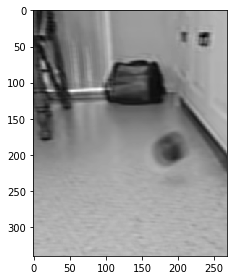

In [151]:
from skimage import io

io.imshow(np.array(li))

In [103]:
cv2.imshow?

In [148]:
li

[[0.2676820158958435,
  0.2676282525062561,
  0.2894311547279358,
  0.3074856996536255,
  0.27660900354385376,
  0.23655851185321808,
  0.20136262476444244,
  0.19233207404613495,
  0.16600008308887482,
  0.13223199546337128,
  0.11642508208751678,
  0.12967829406261444,
  0.17012552917003632,
  0.22528739273548126,
  0.27318209409713745,
  0.28956717252731323,
  0.279386043548584,
  0.2511829137802124,
  0.2143472582101822,
  0.1756647378206253,
  0.14862342178821564,
  0.13736969232559204,
  0.14197984337806702,
  0.1558220088481903,
  0.17873530089855194,
  0.20758216083049774,
  0.24279074370861053,
  0.2838185429573059,
  0.3189547061920166,
  0.3482292890548706,
  0.36968135833740234,
  0.3831772208213806,
  0.39396822452545166,
  0.4070064425468445,
  0.4138936996459961,
  0.42450809478759766,
  0.439269483089447,
  0.44939273595809937,
  0.4583616256713867,
  0.467967689037323,
  0.482923686504364,
  0.49648410081863403,
  0.5065144896507263,
  0.5146867632865906,
  0.520620763